# 対象データ表示

In [2]:
import numpy as np
import matplotlib.pyplot as plt

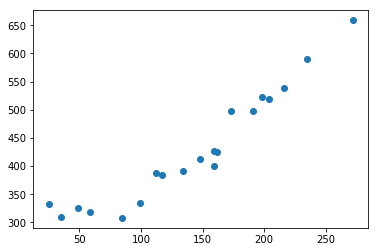

In [3]:
# 学習データを読み込む
train = np.loadtxt('testdata/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# Plot
plt.plot(train_x, train_y, 'o')
plt.show()

# 単回帰

In [4]:
# 標準化
# z-score正規化ともいう。
# パラメータの収束が早くなるのが利点
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x

# 目的関数：誤差平方和
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

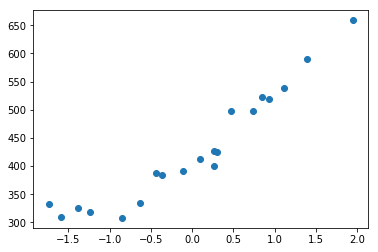

In [5]:
# Plot スケールが小さくなっている
plt.plot(train_z, train_y, 'o')
plt.show()

In [6]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


1回目: theta0 = 9.085, theta1 = 2.667, 差分 = 76157.5221
2回目: theta0 = 17.486, theta1 = 4.483, 差分 = 73141.6842
3回目: theta0 = 25.720, theta1 = 6.263, 差分 = 70245.2735
4回目: theta0 = 33.788, theta1 = 8.008, 差分 = 67463.5607
5回目: theta0 = 41.696, theta1 = 9.717, 差分 = 64792.0037
6回目: theta0 = 49.445, theta1 = 11.392, 差分 = 62226.2403
7回目: theta0 = 57.039, theta1 = 13.034, 差分 = 59762.0812
8回目: theta0 = 64.481, theta1 = 14.643, 差分 = 57395.5028
9回目: theta0 = 71.774, theta1 = 16.220, 差分 = 55122.6409
10回目: theta0 = 78.922, theta1 = 17.765, 差分 = 52939.7843
11回目: theta0 = 85.926, theta1 = 19.279, 差分 = 50843.3689
12回目: theta0 = 92.791, theta1 = 20.763, 差分 = 48829.9715
13回目: theta0 = 99.518, theta1 = 22.217, 差分 = 46896.3046
14回目: theta0 = 106.111, theta1 = 23.643, 差分 = 45039.2109
15回目: theta0 = 112.571, theta1 = 25.039, 差分 = 43255.6582
16回目: theta0 = 118.903, theta1 = 26.408, 差分 = 41542.7341
17回目: theta0 = 125.108, theta1 = 27.750, 差分 = 39897.6418
18回目: theta0 = 131.189, theta1 = 29.064, 差分 = 38317.6952
19

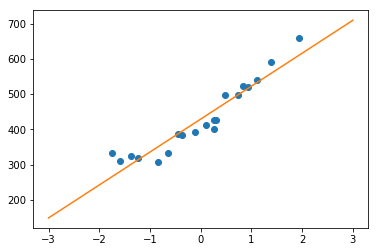

In [7]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

# 多項式回帰

In [8]:
# 学習データを読み込む
train = np.loadtxt('testdata/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

In [9]:
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [10]:
x = train_z
np.vstack([np.ones(x.size), x, x ** 2])

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.39433428,  1.11069026,  0.09554325, -1.59139223, -0.8449606 ,
         0.93154667, -1.38239138, -1.74067856,  0.46875906,  0.73747445,
        -0.11345761, -0.63595975, -0.36724436, -0.44188752,  0.3045441 ,
         1.94669369,  0.25975821,  0.25975821, -1.23310505,  0.84197488],
       [ 1.94416809,  1.23363286,  0.00912851,  2.53252924,  0.71395842,
         0.8677792 ,  1.91100592,  3.02996185,  0.21973506,  0.54386856,
         0.01287263,  0.4044448 ,  0.13486842,  0.19526458,  0.09274711,
         3.78961632,  0.06747433,  0.06747433,  1.52054807,  0.70892169]])

In [11]:
np.vstack([np.ones(x.size), x, x ** 2]).T

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

In [12]:
# 予測関数:行列式で多項式を簡単に表現
def f(x):
    return np.dot(x, theta)

# 目的関数:誤差平方和
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 前回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    #print(log.format(count, theta, diff))

print(log.format(count, theta, diff))

796回目: theta = [ 405.72788021   95.10329213   23.28717814], 差分 = 0.0098


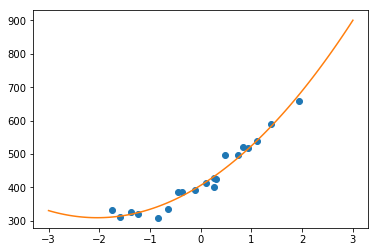

In [13]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

### 誤差の収束具合を確認

In [14]:
X.shape

(20, 3)

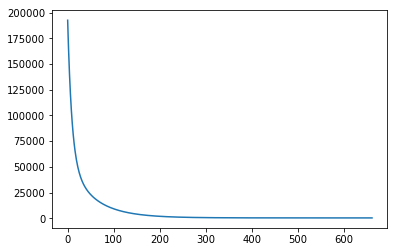

In [15]:
# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)
#def E(x, y):
#    return 0.5 * np.sum((y - f(x)) ** 2)

# パラメータを初期化
theta = np.random.rand(3)

# MSEの履歴
errors = []

# 誤差の差分
diff = 1

# 学習を繰り返す
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
# 誤差をプロット
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

# SGD

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('testdata/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

# 予測関数
def f(x):
    return np.dot(x, theta)

# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す
error = MSE(X, train_y)
while diff > 1e-2:
    # 確率的勾配降下法でパラメータ更新
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x

    # 前回の誤差との差分を計算
    current_error = MSE(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))


1回目: theta = [ 8.85258318  2.58001606  9.52975783], 差分 = 14966.7937
2回目: theta = [ 16.91616373   4.42996688  17.7377134 ], 差分 = 13518.2377
3回目: theta = [ 24.66675602   6.22562092  25.46500949], 差分 = 12225.5157
4回目: theta = [ 32.11499111   7.99801438  32.66170142], 差分 = 11011.3410
5回目: theta = [ 39.27974558   9.74057223  39.44290836], 差分 = 9984.1569
6回目: theta = [ 46.16493654  11.47717507  45.77555984], 差分 = 9021.8668
7回目: theta = [ 52.79313064  13.18799303  51.71397653], 差分 = 8179.4536
8回目: theta = [ 59.17509365  14.87316688  57.26326963], 差分 = 7412.1014
9回目: theta = [ 65.32236989  16.54990854  62.47447293], 差分 = 6740.6572
10回目: theta = [ 71.25093143  18.18378366  67.33289807], 差分 = 6117.4642
11回目: theta = [ 76.97164411  19.75786357  71.84968354], 差分 = 5551.7487
12回目: theta = [ 82.48613728  21.34878909  76.08203484], 差分 = 5066.9140
13回目: theta = [ 87.80985513  22.90053158  80.01574989], 差分 = 4613.1344
14回目: theta = [ 92.95494853  24.41897441  83.68067157], 差分 = 4212.4916
15回目: theta = 

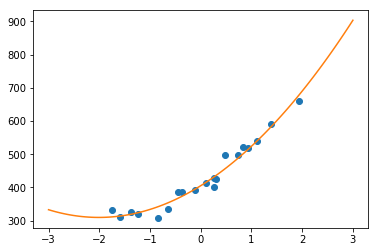

In [17]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

# パーセプトロン

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('testdata/images1.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

# 重みの初期化 2変数つかってるから（縦横）
w = np.random.rand(2)

# 識別関数:法線ベクトルの直線を使って判別
def f(x):
    if np.dot(w, x) >= 0:
        return 1
    else:
        return -1

# 繰り返し回数
epoch = 20

# 更新回数
count = 0

# 重みを学習する
for _ in range(epoch):
    print("***** {} *****".format(_+1))
    for x, y in zip(train_x, train_y):
        if f(x) != y:
            print('w = {} | x={}, y={} '.format(w, x,y))
            w = w + y * x

            # ログの出力
            count += 1
            print('{}回目: w = {} | x={}, y={} '.format(count, w, x,y))

***** 1 *****
w = [ 0.96233477  0.21209074] | x=[ 153.  432.], y=-1.0 
1回目: w = [-152.03766523 -431.78790926] | x=[ 153.  432.], y=-1.0 
w = [-152.03766523 -431.78790926] | x=[ 474.  384.], y=1.0 
2回目: w = [ 321.96233477  -47.78790926] | x=[ 474.  384.], y=1.0 
w = [ 321.96233477  -47.78790926] | x=[ 233.  430.], y=-1.0 
3回目: w = [  88.96233477 -477.78790926] | x=[ 233.  430.], y=-1.0 
w = [  88.96233477 -477.78790926] | x=[ 396.  321.], y=1.0 
4回目: w = [ 484.96233477 -156.78790926] | x=[ 396.  321.], y=1.0 
w = [ 484.96233477 -156.78790926] | x=[ 399.  433.], y=-1.0 
5回目: w = [  85.96233477 -589.78790926] | x=[ 399.  433.], y=-1.0 
w = [  85.96233477 -589.78790926] | x=[ 403.  300.], y=1.0 
6回目: w = [ 488.96233477 -289.78790926] | x=[ 403.  300.], y=1.0 
w = [ 488.96233477 -289.78790926] | x=[ 379.  416.], y=-1.0 
7回目: w = [ 109.96233477 -705.78790926] | x=[ 379.  416.], y=-1.0 
w = [ 109.96233477 -705.78790926] | x=[ 263.  112.], y=1.0 
8回目: w = [ 372.96233477 -593.78790926] | x=[ 26

In [37]:
f(train_x[0])

-1

In [33]:
train_y[0] * train_x[0]

array([-153., -432.])

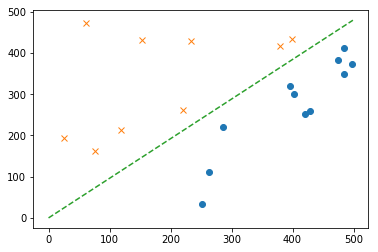

In [19]:
# プロットして確認
x1 = np.arange(0, 500)
plt.plot(train_x[train_y ==  1, 0], train_x[train_y ==  1, 1], 'o')
plt.plot(train_x[train_y == -1, 0], train_x[train_y == -1, 1], 'x')
plt.plot(x1, -w[0] / w[1] * x1, linestyle='dashed')
plt.show()

# ロジスティック回帰

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('testdata/images2.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

# パラメータを初期化 3個用意
theta = np.random.rand(3)

# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

In [14]:
# x0を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

X = to_matrix(train_z)

# シグモイド関数
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

# 分類関数
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

# 更新回数
count = 0

In [15]:
# 学習を繰り返す
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # ログの出力
    count += 1
    print('{}回目: theta = {}'.format(count, theta))

1回目: theta = [ 0.72864182  0.67583148  0.56809676]
2回目: theta = [ 0.72667926  0.67940041  0.56227875]
3回目: theta = [ 0.72472365  0.68295944  0.55648047]
4回目: theta = [ 0.722775    0.68650857  0.5507019 ]
5回目: theta = [ 0.72083333  0.6900478   0.54494306]
6回目: theta = [ 0.71889863  0.69357713  0.53920393]
7回目: theta = [ 0.71697092  0.69709657  0.53348452]
8回目: theta = [ 0.7150502   0.70060612  0.52778483]
9回目: theta = [ 0.71313648  0.70410579  0.52210484]
10回目: theta = [ 0.71122975  0.70759559  0.51644454]
11回目: theta = [ 0.70933002  0.71107552  0.51080394]
12回目: theta = [ 0.7074373   0.71454559  0.50518301]
13回目: theta = [ 0.70555159  0.71800582  0.49958175]
14回目: theta = [ 0.70367288  0.72145621  0.49400013]
15回目: theta = [ 0.70180118  0.72489678  0.48843815]
16回目: theta = [ 0.69993648  0.72832754  0.48289579]
17回目: theta = [ 0.69807879  0.7317485   0.47737302]
18回目: theta = [ 0.69622809  0.73515968  0.47186983]
19回目: theta = [ 0.6943844   0.7385611   0.46638619]
20回目: theta = [ 0.692

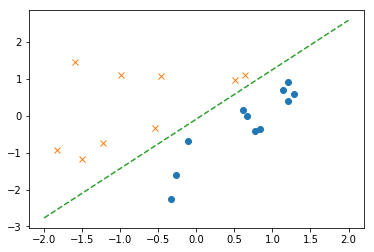

In [16]:
# プロットして確認
x0 = np.linspace(-2, 2, 100)
#x0 = np.linspace(-2, 502, 100)
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o') # [train_y == 1, 0]はTrueFalseでtrain_zの出力を調整しています。２個目の引数は何番目か。
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()

## accuracy

1回目: f(x): [ 0.60383288  0.60424739  0.58828565  0.643098    0.64577441  0.61425703
  0.63010565  0.6426987   0.63135489  0.6108626   0.63589042  0.62999118
  0.59713813  0.64543934  0.6325087   0.58007851  0.60248244  0.57485786
  0.59366685  0.62990667]
1回目: theta = [ 0.47708999  0.08339902  0.02447691]
No.0 classify(X):[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
No.0 result:[False False False  True  True False  True  True  True  True False  True
  True  True False False  True False False  True] accuracy:0.55
2回目: f(x): [ 0.60120905  0.60328796  0.5865099   0.64405905  0.64669599  0.61249813
  0.63063587  0.64395018  0.63256027  0.61083019  0.63583421  0.63070835
  0.59780658  0.64669183  0.63234282  0.57813988  0.60282115  0.57220513
  0.58981575  0.6310556 ]
2回目: theta = [ 0.47575351  0.08998787  0.02168709]
No.1 classify(X):[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
No.1 result:[False False False  True  True False  True  True  True  True False  True
  True  True False False  True Fal

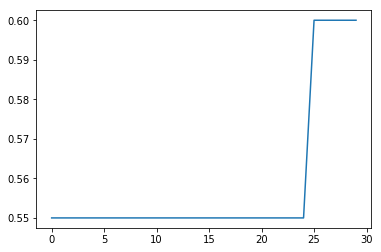

In [22]:
# パラメータ初期化
theta = np.random.rand(3)

# 精度の履歴
accuracies = []
epoch = 30
count = 0
# X...   train_z = standardize(train_x)
#        X = to_matrix(train_z)
# f(x):シグモイド関数 return 1 / (1 + np.exp(-np.dot(x, theta)))
# classify(X): 分類関数 return (f(X) >= 0.5).astype(np.int)

# 学習を繰り返す
for __ in range(epoch):
    # 最終的なパラメータの更新式

    theta = theta - ETA * np.dot(f(X) - train_y, X) #thetaがXXX回目で初めて変わった。
    count += 1
    print("{}回目: f(x): {}".format(count,f(X)))
    #print("f(x)-train_y: {}".format(f(X)-train_y))
    # ログの出力

    print('{}回目: theta = {}'.format(count, theta))
    
    # 現在の精度を計算
    result = classify(X) == train_y # 教師データと同じ値になったらTrueにして、外れた場合はFalse
                                    # ex) [False False False  True False  True False False False False False  True]

    #print("No.{} X:{}".format(_, X))
    print("No.{} classify(X):{}".format(__, classify(X)))
    print("No.{} result:{} accuracy:{}".format(__, result, len(result[result == True]) / len(result)))
    accuracy = len(result[result == True]) / len(result)
    accuracies.append(accuracy)
    
# 精度をプロット
x = np.arange(len(accuracies))

plt.plot(x, accuracies)
plt.show()

In [23]:
# 変更したタイミングのtheta
theta25 = np.array([ 0.44689446,  0.23410946, -0.04121208])
theta26 = np.array([ 0.4457207,   0.24006375, -0.04388934])

In [24]:
# X これはそのまま使うと。
X.shape

(20, 3)

## 後ろから2番目の結果が変わったので、後ろから2番目の値を注目するとマイナスになっている。つまりシグモイドで１→０に変わると。

### X*theta = 総入力

In [25]:
np.dot(X,theta25)

array([ 0.16915937,  0.33246482,  0.19105778,  0.68373277,  0.69135675,
        0.29392073,  0.58478593,  0.71147063,  0.65762637,  0.44949243,
        0.55030211,  0.60297943,  0.46175986,  0.72359389,  0.5252268 ,
        0.1437459 ,  0.45156291,  0.05572394,  0.01216087,  0.64576592])

In [26]:
np.dot(X,theta26)

array([ 0.15911989,  0.32892697,  0.18458642,  0.68744385,  0.69488879,
        0.28708202,  0.58685061,  0.71637063,  0.66240005,  0.44951117,
        0.54994272,  0.60579691,  0.46465977,  0.72848454,  0.52446446,
        0.13677567,  0.45312608,  0.0461006 , -0.00243799,  0.65032082])

## classifyを使って判断しているところをみます(thetaは30回目時点のを使っていることになりますね)

In [28]:
(f(X)-train_y).shape

(20,)

In [18]:
X.shape #x0, x1, x2

NameError: name 'X' is not defined

In [30]:
# ここはただ計算がみたかっただけかな。一発で全てのデータの計算を線形代位数を使って実施。かなり便利です。
np.dot(f(X) - train_y, X)

array([ 1.14079653, -5.83024845,  2.65245554])

### 後ろから2番目が無事０と判断されている

In [34]:
print("{}  {}  {}".format(classify(X[17]),classify(X[18]),classify(X[19])))

1  0  1


In [38]:
# 教師データも後ろから2番目が０が正解ですね。
train_y

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.])

## result = a == bの使い方

In [9]:
a = np.array([1,1,1,1,1])

In [10]:
b = np.array([0,0,0,1,0])

In [11]:
result = a == b

In [12]:
result

array([False, False, False,  True, False], dtype=bool)

## result[result == True]の使い方

In [13]:
accuracy = len(result[result == True]) / len(result)

In [14]:
accuracy

0.2